# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url = URL)

In [4]:
with open('tweet_image_prediction.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
image_prediction = pd.read_csv('tweet_image_prediction.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
tweet = pd.read_json('tweet_json.txt', lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
new_tweet = tweet.filter(['id', 'retweet_count', 'favorite_count'], axis = 1)
new_tweet_rename = new_tweet.copy()
new_tweet_rename.rename(columns = {'id':'tweet_id'}, inplace = True)

In [9]:
df= pd.merge(pd.merge(twitter_archive,image_prediction,on= 'tweet_id', how='left'),
new_tweet_rename,on='tweet_id', how='left', suffixes=('_left', '_right'))
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)

In [10]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6881.0,32923.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5180.0,28457.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3423.0,21380.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7089.0,35889.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7606.0,34324.0


In [11]:
df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Lola           10
Penny          10
Tucker         10
Bo              9
Winston         9
the             8
Sadie           8
an              7
Buddy           7
Daisy           7
Toby            7
Bailey          7
Bella           6
Milo            6
Koda            6
Scout           6
Stanley         6
Jax             6
Dave            6
Jack            6
Leo             6
Rusty           6
Oscar           6
Sunny           5
             ... 
Boston          1
Tango           1
Florence        1
Kingsley        1
Craig           1
Dobby           1
Darrel          1
Cuddles         1
Glacier         1
Rorie           1
incredibly      1
O               1
Anna            1
Hazel           1
Lipton          1
Kobe            1
Rudy            1
Claude          1
Benny           1
Skye            1
Jennifur        1
Gert            1
Brandi          1
Freddery        1
Tuco      

In [12]:
df.nunique().value_counts

<bound method IndexOpsMixin.value_counts of tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
jpg_url                       2009
img_num                          4
p1                             378
p1_conf                       2006
p1_dog                           2
p2                             405
p2_conf                       2004
p2_dog                           2
p3                             408
p3_conf                       2006
p3_dog     

In [13]:
df.index.duplicated().any()

False

In [14]:
df[['timestamp','retweeted_status_timestamp']].sample(20)

,timestamp,retweeted_status_timestamp
373,2017-02-05 22:55:23 +0000,NaN
2315,2015-11-17 18:56:35 +0000,NaN
1822,2015-12-15 01:32:24 +0000,NaN
1369,2016-02-24 03:21:41 +0000,NaN
685,2016-10-17 22:51:57 +0000,NaN
2211,2015-11-23 02:19:29 +0000,NaN
1498,2016-01-27 18:42:06 +0000,NaN
1396,2016-02-17 02:54:04 +0000,NaN
2107,2015-11-28 04:54:34 +0000,NaN
1827,2015-12-14 15:57:56 +0000,NaN


In [15]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2325.000000,2325.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,2426.664086,6876.246022
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,4107.833227,10679.190766
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,488.000000,1197.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1128.000000,2984.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,2807.000000,8403.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,69447.000000,141797.000000


### Quality issues
1. Nan values documented as string None
2. Timestamp => convert to datetime and rename as tweet_date and Tweet_id to str.
3. convert columns doggo, floofer, pupper, puppo to True/False
4. Remove retweets and replies keeping original tweets
5. Drop unneccesary columns
6. Some dog names have capital letters and others lower case - Uniformity Issues
8. Remove HMTL amp stamp  and urls from tweets in text column

7. convert favorite count and retweet count to integer not float
9. Correct all wrong dog names




### Tidiness issues
1. Combine doggo, floofer, pupper and puppa columns into one as they all represent dog stages
2. drop expanded url as it has a lot of multiple urls and others differing url and may not help the analysis


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
df_clean = df.copy()

### Issue #1:

#### Define:
convert None values to NAN
and replace source urls with just the source device

#### Code

In [17]:
df_clean.replace('None', np.nan, inplace = True)
df_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
df_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter_web', inplace=True)
df_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
df_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)


#### Test

## Issue #2:

#### Define

convert timestamp to datetime and rename as tweet_date

#### Code

In [18]:
df_clean.timestamp = pd.to_datetime(df_clean['timestamp'])
df_clean.rename(columns = {'timestamp': 'tweet_date'}, inplace = True)
df_clean.tweet_id = df_clean['tweet_id'].astype('str')

#### Test

## Issue 3
convert columns doggo, floofer, pupper, puppo to True/False

#### Code

In [19]:
df_clean.doggo.replace(np.nan, False, inplace = True)
df_clean.floofer.replace(np.nan, False, inplace = True)
df_clean.pupper.replace(np.nan, False, inplace = True)
df_clean.puppo.replace(np.nan, False, inplace = True)

df_clean.doggo.replace('doggo', True, inplace = True)
df_clean.floofer.replace('floofer', True, inplace = True)
df_clean.pupper.replace('pupper', True, inplace = True)
df_clean.puppo.replace('puppo', True, inplace = True)



#### Test

## Issue 4

Drop retweets and replies and keep original tweets

#### Code

In [20]:
drop_retweet = df_clean[pd.notnull(df_clean['retweeted_status_id'])].index
drop_reply = df_clean[pd.notnull(df_clean['in_reply_to_status_id'])].index

df_clean.drop(index = drop_retweet, inplace = True)
df_clean.drop(index = drop_reply, inplace = True)

#### Test

## Issue 5

Drop columns with very low information

#### Code

In [21]:
df_clean.drop(columns = 'in_reply_to_status_id', inplace = True)
df_clean.drop(columns = 'in_reply_to_user_id', inplace = True)
df_clean.drop(columns = 'retweeted_status_id', inplace = True)
df_clean.drop(columns = 'retweeted_status_user_id', inplace = True)
df_clean.drop(columns = 'retweeted_status_timestamp', inplace = True)

#### Test

## Issue 6



#### Define

Uniformity Issues in dog breed p1,p2,p3, convert all to lowercase

#### Code

In [22]:
df_clean['p1'] = df_clean['p1'].str.lower()
df_clean['p2'] = df_clean['p2'].str.lower()
df_clean['p3'] = df_clean['p3'].str.lower()


#### Test

## Issue 7

#### Define

Remove HMTL amp stamp  and urls from tweets in text column


#### Code

In [23]:
df_clean['text'] = df_clean.text.str.replace('&amp;','&')
df_clean['text'] = df_clean.text.str.replace('\n',' ')
df_clean['text'] = df_clean.text.str.replace(r'http\S+','')
df_clean['text'] = df_clean.text.str.strip()

#### Test

## Issue 8

#### Define

drop NaN values in favorite and retweet count
convert favorite and retweet count from float to int

#### Code

In [24]:
df_clean = df_clean[df_clean['favorite_count'].notna()]
df_clean = df_clean[df_clean['retweet_count'].notna()]
df_clean['favorite_count'] = df_clean['favorite_count'].astype(int)
df_clean['retweet_count'] = df_clean['retweet_count'].astype(int)

#### Test

## Issue 9

#### Define

Correct all non correct dog names

#### code

In [25]:
df_clean['name'] = df_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

#### Test

## Issue 10

#### Define

combine dog stage to one column

#### Code

In [26]:
# Define a function to create a sinlge column for all dog stages

def Dog_Stage(row):
    # Define list to store the data
    dog_stage = []
    # Set the conditional statememts
    if row['doggo'] == 'doggo':
        # Add the entries to the list dog_stage
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    if len(dog_stage) < 1: 
        row['Dog_stage'] = 'None'
    else: 
        row['Dog_stage'] = ' and '.join(dog_stage)
    return row


In [27]:
## Applying the function
df_clean = df_clean.apply(Dog_Stage, axis = 1)
## drop the merged columns
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)



#### Test

## Issue 10

#### Define

drop the column expanded_url to keep table tidy

#### Code

In [28]:
df_clean = df_clean.drop(columns = 'expanded_urls')

#### Test

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [29]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [30]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6881,32923,None
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5180,28457,None
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3423,21380,None
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7089,35889,None
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7606,34324,None


### Insights:
1. Most popular dog names (Cooper, Charlie,Lucie,Oliver)

2. Most popular tweet source (Iphone)

3. Most favorited and retweeted tweets

### Visualization

#### Most popular dog names

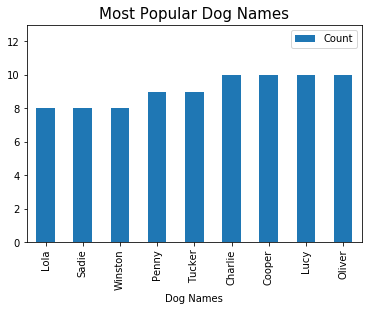

In [31]:
dogs_names = df_master.query('name == name')
dog_names_grouped = dogs_names.groupby('name').count()[['tweet_id']]
dog_names_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
dog_names_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=13)
plt.title("Most Popular Dog Names",{'fontsize': 15})
plt.xlabel("Dog Names")
plt.legend(["Count"]);

#### Most popular tweet source = Iphone

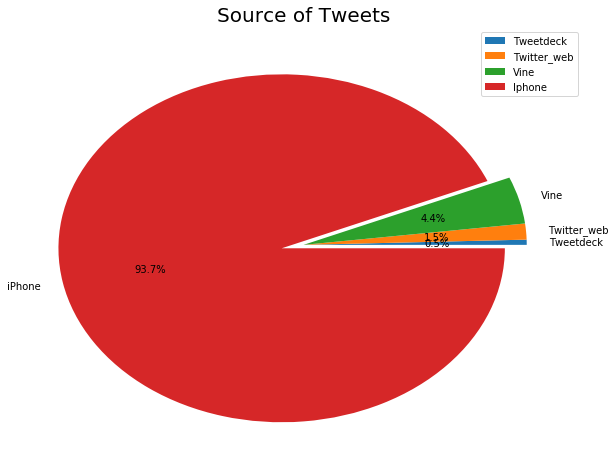

In [32]:
tweet_sources = df_master.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0,0,0.1));

plt.title('Source of Tweets', {'fontsize': 20})
plt.legend(['Tweetdeck','Twitter_web','Vine','Iphone'])
plt.ylabel('');

#### Most favorited and retweeted tweet (labrador_retriever)

In [33]:
df_master[df_master.favorite_count == df_master.favorite_count.max()]


,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
818,744234799360020481,2016-06-18 18:26:18,iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),13,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,69447,141797,None


In [34]:
df_master[df_master.retweet_count==df_master.retweet_count.max()]

,tweet_id,tweet_date,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Dog_stage
818,744234799360020481,2016-06-18 18:26:18,iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),13,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,69447,141797,None
